In [2]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

xls = pd.ExcelFile("C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shop Analyse.xlsx")
df1 = pd.read_excel(xls, 'P1')
df2 = pd.read_excel(xls, 'P2')
df3 =pd.read_excel(xls, 'P3')

In [4]:
df3

,Datum,Umsatz
0,Jan,148945.166650
1,Feb,128859.949494
2,Mrz,141602.709028
3,Apr,133780.491099
4,Mai,135993.779232
5,Jun,135206.767009
6,Jul,143531.783519
7,Aug,139714.627028
8,Sep,130178.025891
9,Okt,128966.717912


In [5]:
xl_de = pd.ExcelFile("C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shop Analyse.xlsx")
combined = pd.concat([xl_de.parse(sheet) for sheet in xl_de.sheet_names], ignore_index=True)
combined

,Datum,Umsatz
0,Jan,148945.166650
1,Feb,128859.949494
2,Mrz,141602.709028
3,Apr,133780.491099
4,Mai,135993.779232
5,Jun,135206.767009
6,Jul,143531.783519
7,Aug,139714.627028
8,Sep,130178.025891
9,Okt,128966.717912


In [6]:
csv = pd.read_csv("C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shopauswertung.csv", sep=";")
csv

,Datum,Produkt,Umsatz
0,01.01.2021,A,17.132115
1,02.01.2021,A,57.353725
2,03.01.2021,A,114.746857
3,04.01.2021,A,113.251181
4,05.01.2021,A,4.186462
...,...,...,...
1090,27.12.2021,A+B+C,197909.241600
1091,28.12.2021,A+B+C,198014.840500
1092,29.12.2021,A+B+C,198355.276000
1093,30.12.2021,A+B+C,199081.446100


In [7]:
def best_prices(Umsatz):
    lowest_prices=[]
    price_list=[]
    for i in Umsatz:
            if i==[1]:
                store_min=min(price_list)
                print(store_min)
                print(price_list)
    return lowest_prices
best_prices("Umsatz")



[]

In [8]:
df1["Umsatz"].compare(csv['Umsatz'], result_names=("p1", "p2"))

ValueError: Can only compare identically-labeled Series objects

In [ ]:
import matplotlib.pyplot as plot
df1.plot.bar()
plot.title("Umsatz P1")
plot.xlabel("Monat")
plot.ylabel("Umsatz")
plot.savefig("Umsatz P1.png")

In [ ]:
import matplotlib.pyplot as plot
df2.plot.bar()
plot.title("Umsatz P2")
plot.xlabel("Monat")
plot.ylabel("Umsatz")
plot.savefig("Umsatz P2.png")

In [ ]:
import matplotlib.pyplot as plot
df3.plot.bar()
plot.title("Umsatz P3")
plot.xlabel("Monat")
plot.ylabel("Umsatz")
plot.savefig("Umsatz P3.png")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1["Datum"], df1["Umsatz"], label = "Umsatz P1")
plt.plot(df2["Datum"], df2["Umsatz"], label = "Umsatz P2")
plt.plot(df3["Datum"], df3["Umsatz"], label = "Umsatz P3")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1["Datum"], df1["Umsatz"], label = "Umsatz P1", color="green")
plt.plot(df2["Datum"], df2["Umsatz"], label = "Umsatz P2", color="black")
plt.plot(df3["Datum"], df3["Umsatz"], label = "Umsatz P3",color="violet")
plt.legend()
#plt.show()
plot.savefig("3Produkten DE.png")

In [19]:
import pandas as pd

df_eu = pd.read_csv('C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shopauswertung.csv', delimiter=';')

df_eu_pivot = df_eu.pivot(columns='Produkt', index='Datum', values='Umsatz')
df_eu_pivot['C'] = df_eu_pivot['A+B+C'] - df_eu_pivot['A'] - df_eu_pivot['B']

df_eu_pivot = df_eu_pivot.reset_index()
df_eu_pivot = pd.melt(df_eu_pivot, id_vars=['Datum'], value_vars=['A', 'B', 'C'], var_name='Produkt', value_name='Umsatz')
df_eu_pivot['Datum'] = pd.to_datetime(df_eu_pivot['Datum'], format='%d.%m.%Y')
df_eu_pivot['Datum'] = df_eu_pivot['Datum'].dt.strftime('%b')

df_eu_pivot = df_eu_pivot.set_index('Datum')
df_eu_pivot['Region'] = 'EU'

df_eu_pivot

,Produkt,Umsatz,Region
Datum,,,
Jan,A,17.132115,EU
Feb,A,16.396013,EU
Mar,A,136.595746,EU
Apr,A,161.018321,EU
May,A,17.224495,EU
...,...,...,...
May,C,87246.846359,EU
Jul,C,112612.622614,EU
Aug,C,126707.618812,EU


In [ ]:
import seaborn as sns

sns.lineplot( x = "Datum",
             y = "Produkt",
             data = df_eu_pivot);
#plot.savefig("De.png")

TypeError: 'method' object is not subscriptable

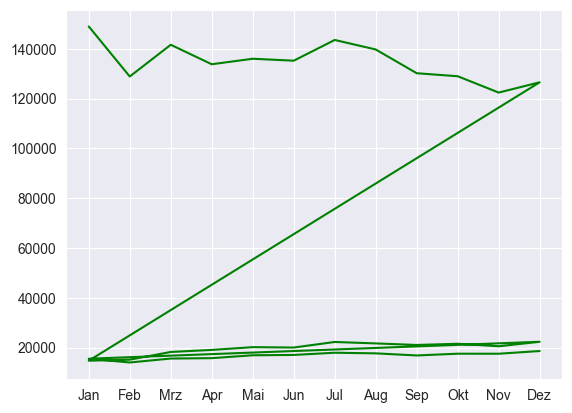

In [18]:
import matplotlib.pyplot as plt
plt.plot(combined["Datum"], combined["Umsatz"], label = "DE", color="green")
plt.plot(df_eu.pivot["Produkt"], df_eu.pivot["Umsatz"], label = "Europa", color="blue")
plt.legend()
plt.show()
#plot.savefig("De und Europa.png")

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = combined.plot(x='Datum', y='Umsatz')
df_eu_pivot.plot(ax=ax, x='Produkt', y='Umsatz')

plt.show()

In [9]:
df_eu = pd.read_csv("C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shopauswertung.csv",sep=';')


df_eu_pivot = df_eu.pivot(columns='Produkt',index='Datum', values='Umsatz')
df_eu_pivot['C_new']= df_eu_pivot['A+B+C']-df_eu_pivot['A']-df_eu_pivot['B']

df_eu_pivot.columns
print(df_eu_pivot)

Produkt              A         A+B+C             B          C_new
Datum                                                            
01.01.2021   17.132115   18598.65588    189.467425   18392.056339
01.02.2021   16.396013   36098.71366   1825.467425   34256.850222
01.03.2021  136.595746   48739.43182   3211.467425   45391.368649
01.04.2021  161.018321   64543.14148   4570.467425   59811.655734
01.05.2021   17.224495   81075.32567   6084.467425   74973.633750
...                ...           ...           ...            ...
31.05.2021    4.597326   94724.91111   7473.467425   87246.846359
31.07.2021  139.362356  123327.45240  10575.467430  112612.622614
31.08.2021   25.023058  139021.10930  12288.467430  126707.618812
31.10.2021   56.993978  170955.96420  15422.467430  155476.502792
31.12.2021  111.467425  199213.85310  18533.467430  180568.918245

[365 rows x 4 columns]


In [17]:
import matplotlib.pyplot as plt
plt.plot(df_eu.pivot["Produkt"], df_eu.pivot["A"], label = "Umsatz P1", color="green")
plt.plot(df_eu.pivot["Produkt"], df_eu.pivot["B"], label = "Umsatz P2", color="black")
plt.plot(df_eu.pivot["Produkt"], df_eu.pivot["A+B+C"], label = "Umsatz P3",color="violet")
plt.legend()
plt.show()
#plot.savefig("3Produkten DE.png")

TypeError: 'method' object is not subscriptable

In [20]:
import matplotlib.pyplot as plt

# Filtern die Daten nur für die Region EU und die Produkte A, B und C
df_EU_ABC = df_combined[(df_combined['Region'] == 'EU') & (df_combined['Produkt'].isin(['A', 'B', 'C']))]

# Gruppieren die Daten nach Datum und Produkt
grouped_data = df_EU_ABC.groupby(['Datum', 'Produkt']).sum().reset_index()

# Erstelle ein Pivot-Diagramm
pivot_data = grouped_data.pivot(index='Datum', columns='Produkt', values='Umsatz')

NameError: name 'df_combined' is not defined